# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [3]:
# student 1:ANNA 6868

This project applies supervised machine learning techniques to the Titanic dataset, aiming to predict passenger survival based on features like age, gender, and ticket class. We will preprocess the data, build models, and evaluate them. The Titanic dataset, with its mix of categorical and numerical features, provides a well-rounded introduction to supervised learning and model evaluation.

not survived = 0 survived = 1,woman = 0 man = 1 

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [6]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import MultinomialNB as nb
from sklearn.model_selection import GridSearchCV as GridS, KFold, StratifiedKFold
from sklearn.feature_selection import SelectKBest, VarianceThreshold, r_regression as pearson
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [7]:
#load train and test
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")


In [8]:
#Print first 5 rows of each dataset 
print('\033[1m'+"Train dataset:"+ '\033[0m')
print(train.head())
print("\n------------------------------------------------------------------------------------\n")
print('\033[1m'+"Test dataset:"+ '\033[0m')
print(test.head())

Train dataset:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

------------------------------------------------------------------------------------

Test dataset:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


### EDA

In [10]:
#Basic statistics
print('\033[1m'+"Train info:"+ '\033[0m')
train.info()

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [11]:
#Basic statistics
train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


#### Creating correlation matrix

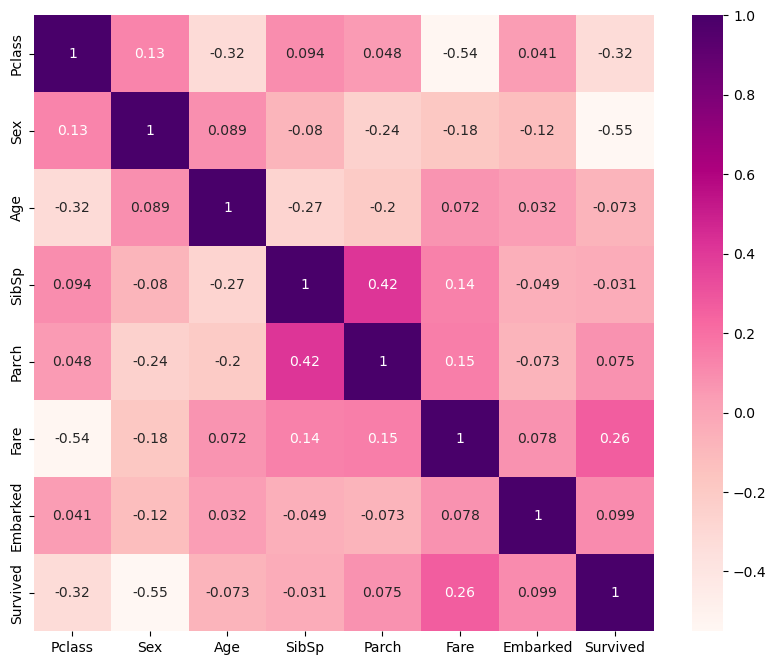

In [13]:
#visualizations statistics 
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='RdPu')
plt.show()

#### Creates a two bar charts to visualize the number of male and female passengers who survived or did not survive the Titanic disaster, 
#### with red bars = deaths and green = survivors

Male not survived=368.Famle not survived=63.Male survived=88.Famle survived=193.



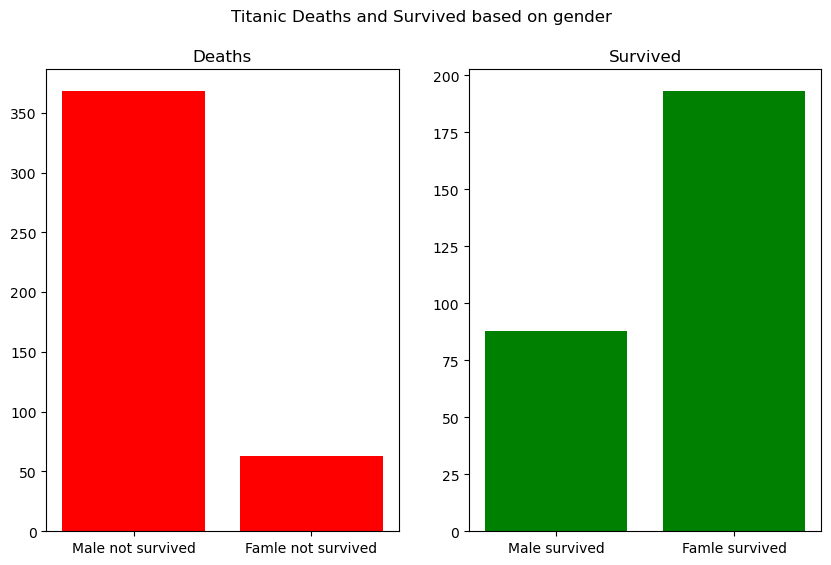

In [15]:
#Basic statistics and visualizations
df_count = pd.DataFrame(train.value_counts(subset = ["Sex", "Survived"]))


count_list=list(df_count["count"])
count_list = (count_list[0],count_list[3],count_list[2],count_list[1])
x_labels = ["Male not survived","Famle not survived","Male survived","Famle survived"]
for x in range(4):
  print(x_labels[x]+"="+(str(count_list[x])), end =".")
print("\n")
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].bar(x_labels[:2],count_list[:2], color = "red")
ax[0].set_title('Deaths')
ax[1].bar(x_labels[2:],count_list[2:], color = "green")
ax[1].set_title('Survived')
fig.suptitle("Titanic Deaths and Survived based on gender")
plt.show()



#### Two pie charts showing the distribution of passengers by class (1st, 2nd, 3rd) among those who survived and those who died on the Titanic

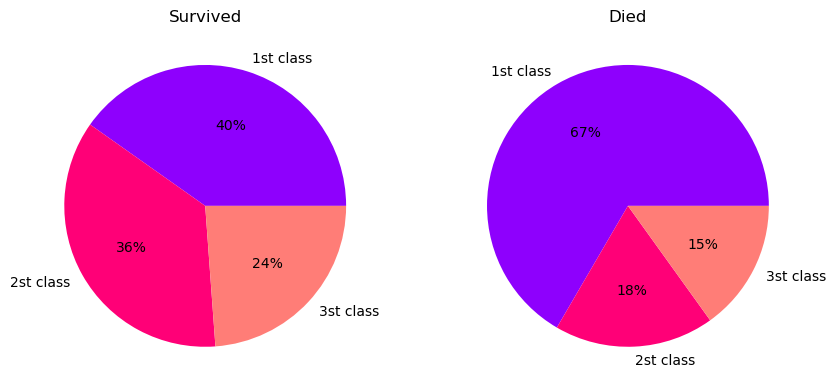

In [17]:
#visualizations statistics 
fig, ax = plt.subplots(1,2,figsize = (10,6))
pallete_color=["#8e00fd","#ff0077","#ff7d77"]
surved = train[train["Survived"] == 1]
notSurved = train[train["Survived"] == 0]
ax[0].pie(surved["Pclass"].value_counts(), labels = ["1st class", "2st class", "3st class"], colors = pallete_color, autopct = '%.0f%%')
ax[1].pie(notSurved["Pclass"].value_counts(), labels = ["1st class", "2st class", "3st class"], colors = pallete_color, autopct = '%.0f%%')
ax[0].set_title("Survived")
ax[1].set_title("Died")
plt.show()

#### Creates a density plot showing the age distribution of passengers who survived (in green) versus those who did not survive (in red)

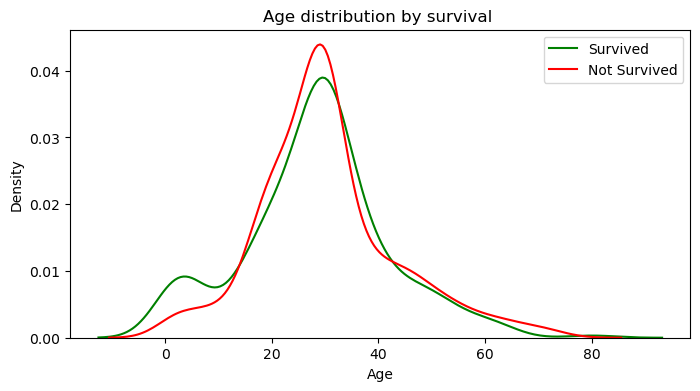

In [19]:
#visualizations statistics
fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(surved['Age'], ax=ax, label='Survived', color='green')
sns.kdeplot(notSurved['Age'], ax=ax, label='Not Survived', color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.set_title('Age distribution by survival ')
ax.legend()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

### 3.1 Feature engineering

* In this part I will be using 4 different learning algorithms, two of them we learned in class (KNN, Naive Bayes) and two of them we did not learn (Random Forest, Gradient Boosting) the following pipeline removes low-variance features, selects top features, scales them, and applies the algorithms for classification, I am creating one for each algorithm (KNN, Naive Bayes, Random Forest and Gradient Boosting) I will do a before and after to see the result of each model after using Grid Search and select the model with the best f1 score

#### KNN

In [24]:
pipe_KNN = Pipeline([
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('StandardScaler', StandardScaler()),
    ('KNN', KNN())
])

#### Naive Bayes

In [26]:
pipe_NB = Pipeline([
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('MinMaxScaler', MinMaxScaler()),
    ('NaiveBayes', nb())
])

#### RandomForest

* Builds multiple decision trees on random data subsets and combines their predictions, reducing overfitting and improving accuracy.

In [29]:
pipe_rf = Pipeline([
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('MinMaxScaler', MinMaxScaler()),
    ('RandomForest', rf(random_state=42))
])

#### Gradient Boosting

* Sequentially builds trees to correct previous errors, offering high accuracy but with increased sensitivity to overfitting.

In [32]:
pipe_gbc = Pipeline([
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('MinMaxScaler', MinMaxScaler()),
    ('gbc', gbc(random_state=42))
])

#### 3.2 Hyper parameters

* The hyperparameter grid is designed to optimize the models by testing different values for the number of neighbors, distance metrics, variance thresholds for feature removal, and whether to use all or selected features. I am using hyperparameters to try and get the best result out of the models

In [35]:
params_KNN = {
    'KNN__n_neighbors':  range(1,14),
    'varianceThreshold__threshold': [0.002, 0.051, 0.010, 0.20, 0.004, 0.5],
    'KBest__k': ['all'],
    'KNN__metric' : ['manhattan', 'euclidean',"minkowski"]
}

In [36]:
params_NB = {
    'NaiveBayes__alpha':  [0.023, 0.005, 0.01, 0.009, 3.0, 1.0, 7.0, 20.0],
    'KBest__k': ['all'],
    'varianceThreshold__threshold': [0.01, 0.1, 0.2, 0.4, 0.5, 1e-2, 1e-1, 1, 10, 100],
    'NaiveBayes__force_alpha': [True, False],
    'NaiveBayes__fit_prior': [True, False]
}

In [37]:
params_rf = {
    'RandomForest__n_estimators': [50, 100],  
    'RandomForest__max_depth': [2, 10, 20],
    'RandomForest__min_samples_split': [2, 8],
    'RandomForest__min_samples_leaf': [1, 2],
    'KBest__k': ['all'],
    'varianceThreshold__threshold': [0.001]
}

In [38]:
params_gbc = {
    'gbc__n_estimators' : [150, 400],
    'gbc__learning_rate' : [0.07, 0.003, 0.002],
    'KBest__k': ['all'],
    'varianceThreshold__threshold': [0.001,0.01]
}

#### 3.3 Cross validation

#### Experiment

* Here we can see the result of f1 score before grid search method 

#### KNN

In [43]:
train_copy = train.copy()
test_copy = test.copy()
model = KNN(n_neighbors=3, metric = "manhattan")
model.fit(train_copy.drop('Survived', axis = 1), train_copy['Survived'])
y_predict = model.predict(test_copy.drop('Survived', axis = 1))
cm = confusion_matrix(test_copy['Survived'], y_predict)
baseline_f1_knn = f1_score(test_copy['Survived'], y_predict)
print("F1 score estimate for the KNN model: ", baseline_f1_knn)

F1 score estimate for the KNN model:  0.5666666666666667


#### Naive Bayes

In [45]:
model = nb(alpha = 0.9, fit_prior = False)
model.fit(train_copy.drop('Survived', axis = 1), train_copy['Survived'])
y_predict = model.predict(test_copy.drop('Survived', axis = 1))
cm = confusion_matrix(test_copy['Survived'], y_predict)
baseline_f1_nb = f1_score(test_copy['Survived'], y_predict)
print("F1 score estimate for the Naive Bayes model: ", baseline_f1_nb)

F1 score estimate for the Naive Bayes model:  0.5242718446601942


#### RandomForest

In [47]:
model = rf(n_estimators=100, max_depth=10, random_state=42)
model.fit(train_copy.drop('Survived', axis=1), train_copy['Survived'])
y_predict = model.predict(test_copy.drop('Survived', axis=1))
cm = confusion_matrix(test_copy['Survived'], y_predict)
baseline_f1_rf = f1_score(test_copy['Survived'], y_predict)
print("F1 score estimate for the RandomForest model: ", baseline_f1_rf)

F1 score estimate for the RandomForest model:  0.8275862068965517


#### Gradient Boosting

In [49]:
model = gbc(n_estimators = 150, learning_rate = 0.09)
model.fit(train_copy.drop('Survived', axis = 1), train_copy['Survived'])
y_predict = model.predict(test_copy.drop('Survived', axis = 1))
cm = confusion_matrix(test_copy['Survived'], y_predict)
baseline_f1_gbc = f1_score(test_copy['Survived'], y_predict)
print("F1 score estimate for the Gradient Boosting model: ", baseline_f1_gbc)

F1 score estimate for the Gradient Boosting model:  0.8245614035087719


#### Result

In [51]:
f1_arr_baseline = [
    round(baseline_f1_knn, 2), 
    round(baseline_f1_nb, 2), 
    round(baseline_f1_rf, 2), 
    round(baseline_f1_gbc, 2)
]
comparison_table = pd.DataFrame({
    "Model": ["KNN", "Naive Bayes", "Random Forest", "Gradient Boosting"],
    "F1 Score": f1_arr_baseline
})
comparison_table

,Model,F1 Score
0,KNN,0.57
1,Naive Bayes,0.52
2,Random Forest,0.83
3,Gradient Boosting,0.82


##### we can see here that RandomForest got the best result	

#### 3.3 Grid Search

* Now in this part I am applying the grid search method on the models to see how it will change the f1 score and according to that choose the best model

In [55]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
gridSearch = GridS(pipe_KNN, params_KNN, scoring='f1', cv=folds)
gridSearch.fit(train.drop('Survived', axis = 1), train['Survived'])
best_model_KNN = gridSearch.best_estimator_
best_score_KNN = gridSearch.best_score_
best_params_KNN = gridSearch.best_params_
print("The optimal F1 score from the best configuration is: " ,best_score_KNN)

The optimal F1 score from the best configuration is:  0.749094017094017


In [56]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
    
gridSearch = GridS(pipe_NB, params_NB, scoring='f1', cv=folds)
gridSearch.fit(train.drop('Survived', axis = 1), train['Survived'])
best_model_NB = gridSearch.best_estimator_
best_score_NB = gridSearch.best_score_
best_params_NB = gridSearch.best_params_
print("The optimal F1 score from the best configuration is: " , best_score_NB)

The optimal F1 score from the best configuration is:  0.6912484293899673


In [57]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
gridSearch = GridS(pipe_rf, params_rf, scoring='f1', cv=folds)
gridSearch.fit(train.drop('Survived', axis = 1), train['Survived'])
best_model_rf = gridSearch.best_estimator_
best_score_rf = gridSearch.best_score_
best_params_rf = gridSearch.best_params_
print("The optimal F1 score from the best configuration is: " , best_score_rf)

The optimal F1 score from the best configuration is:  0.759871584591955


In [58]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
gridSearch = GridS(pipe_gbc, params_gbc, scoring='f1', cv=folds)
gridSearch.fit(train.drop('Survived', axis = 1), train['Survived'])
best_model_gbc = gridSearch.best_estimator_
best_score_gbc = gridSearch.best_score_
best_params_gbc = gridSearch.best_params_
print("The optimal F1 score from the best configuration is: " , best_score_gbc)

The optimal F1 score from the best configuration is:  0.754733153955122


#### Result

In [60]:
f1_arr = [round(best_score_KNN, 2), round(best_score_NB, 2), round(best_score_rf, 2), round(best_score_gbc, 2)]
labels = ["KNN", "Naive Bayes", "Random Forest", "Gradient Boosting"]
df_f1_scores = pd.DataFrame({
    'Model': labels,
    'F1 Score': f1_arr
})
df_f1_scores

,Model,F1 Score
0,KNN,0.75
1,Naive Bayes,0.69
2,Random Forest,0.76
3,Gradient Boosting,0.75


##### we can see here that RandomForest got the best result after the grid search method

In [62]:
comparison_dictionary = {
    'KNN': best_params_KNN,
    'Naive Bayes': best_params_NB,
    'Random Forest': best_params_rf,
    'Gradient Boosting': best_params_gbc,
}
df = pd.DataFrame(comparison_dictionary)
df.fillna("-", inplace=True)
df = df.T
df["F1 Score"] = [best_score_KNN, best_score_NB, best_score_rf, best_score_gbc]
df.sort_values(by="F1 Score", inplace=True, ascending=False)
df

,KBest__k,KNN__metric,KNN__n_neighbors,varianceThreshold__threshold,NaiveBayes__alpha,NaiveBayes__fit_prior,NaiveBayes__force_alpha,RandomForest__max_depth,RandomForest__min_samples_leaf,RandomForest__min_samples_split,RandomForest__n_estimators,gbc__learning_rate,gbc__n_estimators,F1 Score
Random Forest,all,-,-,0.001,-,-,-,10,1,2,50,-,-,0.759872
Gradient Boosting,all,-,-,0.001,-,-,-,-,-,-,-,0.07,150,0.754733
KNN,all,manhattan,13,0.002,-,-,-,-,-,-,-,-,-,0.749094
Naive Bayes,all,-,-,0.01,20.0,False,True,-,-,-,-,-,-,0.691248


* As we can see RandomForest got the best f1 result, we will choose this model for the next step

#### Best model

In [65]:
selected_model = best_model_rf

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [67]:
selected_model.fit(train.drop('Survived', axis = 1), train['Survived'])
y_predict = selected_model.predict(test.drop('Survived', axis = 1))

## Part 5 - Apply on test and show model performance estimation

* I will run tests on the best model to make sure it does give the best result

In [70]:
pred_df = test.copy()
pred_df["Survived Prediction"] = y_predict
pred_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Survived Prediction
0,3,1,35.000000,0,0,7.0500,0,0,0
1,3,1,30.000000,0,0,7.2500,0,0,0
2,3,1,29.699118,0,0,14.5000,0,0,0
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1


In [71]:
selected_model.fit(train.drop('Survived', axis = 1), train['Survived'])
y_predict = selected_model.predict(test.drop('Survived', axis = 1))
cm = confusion_matrix(test['Survived'], y_predict)
best_f1 = f1_score(test['Survived'], y_predict)
cm_df = pd.DataFrame(cm)
cm_df.index = cm_df.columns = ["True", "False"]
print("Confusion Matrix for Selected Model, F1 score of: ", best_f1)
cm_df

Confusion Matrix for Selected Model, F1 score of:  0.8448275862068966


,True,False
True,112,6
False,12,49


In [72]:
report = classification_report(test['Survived'], y_predict,output_dict=True)
df_report=pd.DataFrame(report)
df_report.transpose()

,precision,recall,f1-score,support
0,0.903226,0.949153,0.925620,118.000000
1,0.890909,0.803279,0.844828,61.000000
accuracy,0.899441,0.899441,0.899441,0.899441
macro avg,0.897067,0.876216,0.885224,179.000000
weighted avg,0.899028,0.899441,0.898087,179.000000
